In [3]:
import numpy as np
import pandas as pd
import os
import sys
import seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt
import scipy
from mpl_toolkits.mplot3d import Axes3D

In [4]:
def fast_normal_mean_criterion(mu, sigma, sample, n_simulations):
    s = mu.shape
    flat_mu = mu.flatten()
    flat_sigma = sigma.flatten()
    sim_samples = np.random.normal(loc=flat_mu, scale=flat_sigma, size=(n_simulations, len(flat_mu)))
    diff_mu = sim_samples.mean(axis=0) - sample.mean()
    diff_sigma = sim_samples.std(axis=0) - sample.std()
    diff = np.row_stack([diff_mu, diff_sigma])
    criterion = (diff ** 2).sum(axis=0)
    return criterion.reshape(s)


def fast_smooth_normal_mean_criterion(mu, sigma, sample, n_simulations):
    s = mu.shape
    flat_mu = mu.flatten()
    flat_sigma = sigma.flatten()
    sim_samples = np.zeros((n_simulations, len(flat_mu)))
    sim_samples[:] = np.random.normal(size=(n_simulations, 1))
    sim_samples *= flat_sigma.reshape(1, -1)
    sim_samples += flat_mu.reshape(1, -1)
    diff_mu = sim_samples.mean(axis=0) - sample.mean()
    diff_sigma = sim_samples.std(axis=0) - sample.std()
    diff = np.row_stack([diff_mu, diff_sigma])
    criterion = (diff ** 2).sum(axis=0)
    return criterion.reshape(s) 

In [5]:
def plot_msm(sample_size, n_simulations):
    fig = plt.figure(figsize=(13, 7))
    ax = fig.add_subplot(111, projection='3d')
    mus, sigmas = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(0.1, 1.5, 50))
    x = np.random.normal(size=sample_size)
    criterion = fast_normal_mean_criterion(mus, sigmas, x, n_simulations)
    surf = ax.plot_surface(mus, sigmas, criterion, cmap='coolwarm', edgecolor='none')
    ax.set_xlabel('mu')
    ax.set_ylabel('sigma')
    ax.set_zlabel('MSM-Criterion')
    ax.set_title('MSM-Criterion Function')
    fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
    ax.view_init(20, 30)
    return fig, ax

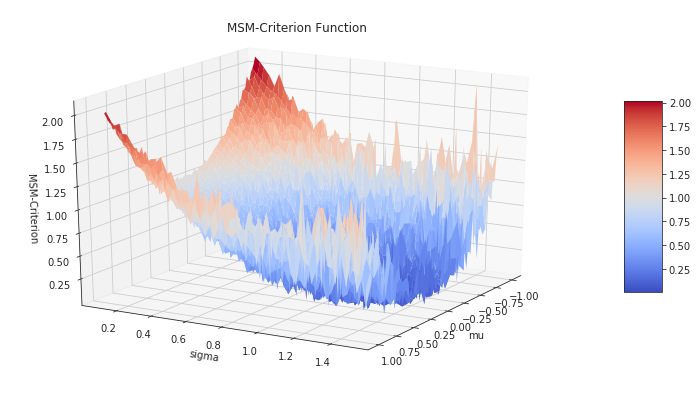

In [6]:
from time import sleep
np.random.seed(5471)
fig, ax = plot_msm(100, 100)

In [22]:
y = np.array([1, 4, 2, 1, 3.0])
y = (y - y.min()).astype(int)
y

array([0, 3, 1, 0, 2])

In [15]:
pd.concat([y, x], axis=1)

In [27]:
sr = pd.Series(data=[1, 2, 3], index=['a', 'b', 'c'])
sr

a    1
b    2
c    3
dtype: int64

In [28]:
df = pd.DataFrame(sr, columns=['value'])

In [29]:
df

,value
a,1
b,2
c,3


In [32]:
{'covariance', 0}

{0, 'covariance'}

In [33]:
from estimagic.optimization.utilities import propose_algorithms